Implement `regularized linear regression` and use it to study models with different `bias-variance properties`.

# Regularized Linear Regression

Implement `regularized linear regression` to predict the amount of water flowing out of a dam using the change of water level in a reservoir

In [1]:
import numpy  as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy
import scipy.optimize as opt
import scipy.io as sio
from scipy.io import loadmat

%matplotlib inline

###### load data

This dataset is divided into three parts:

- A **training** set that your model will learn on: `X`, `y`
- A **cross validation** set for determining the regularization parameter: `Xval`, `yval`
- A **test** set for evaluating performance. These are “unseen” examples which your model did not see during training: `Xtest`, `ytest`

In [2]:
path = "dataset/ex5data1.mat"
ori_data = sio.loadmat(path)
print("ori_data.keys() :", ori_data.keys())

ori_data.keys() : dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


In [3]:
X_ori = ori_data['X']
y_ori = ori_data['y']

X_train = ori_data['X']
y_train = ori_data['y'].reshape((-1,))

X_cv = ori_data['Xval']
y_cv = ori_data['yval'].reshape((-1,))

X_test = ori_data["Xtest"]
y_test = ori_data["ytest"].reshape((-1,))

sample = X_train.shape[0]

## Plot Original Data

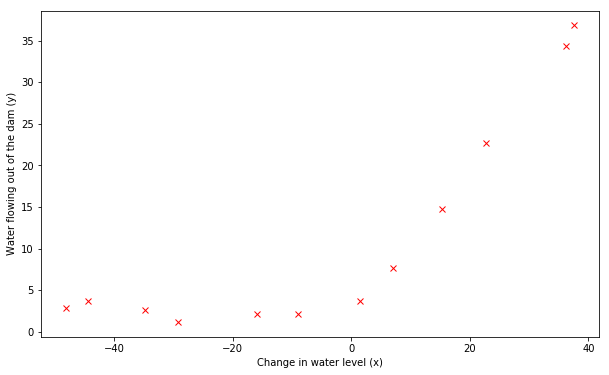

In [4]:
def plot_ori_data(X_ori, y_ori, label_x, label_y, axes=None):
    if axes == None:
        axes = plt.gca()

    axes.plot(X_ori, y_ori, "rx", markersize=6)
        
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)

plt.figure(figsize=(10,6))
plot_ori_data(X_ori, y_ori, 'Change in water level (x)', 'Water flowing out of the dam (y)', plt.gca())

**`Problem with sklearn-learnCurve`**
> + Training with $\lambda$
> + But, calc `train_err` & `cv_err` must without $\lambda$

> + Ridge( ) will normal the data, with the param 'normalize=True'

> + Ridge( ) have a little different with Andrew's Cost_function

###### model.fit( )
[``sklearn.linear_model.Ridge()``](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [5]:
from sklearn import linear_model

In [6]:
Lamd = 1.0
Ridge = linear_model.Ridge(alpha=Lamd, fit_intercept=True, normalize=False)
Ridge.fit(X_train, y_train)
print(">>> Lamd = 0.0")
print("\t\t intercept_\t", Ridge.intercept_)
print("\t\t coef_\t\t", Ridge.coef_)

>>> Lamd = 0.0
		 intercept_	 13.087714160270583
		 coef_		 [0.367742]


###### cost function
[``sklearn.metrics.mean_squared_error()``](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [7]:
from sklearn import metrics

In [8]:
y_pred = Ridge.predict(X_train)
print(y_pred)

[ 7.22709892  2.3669394  26.396131   26.87516596 -4.5855357   9.79956457
 18.71703247  0.3247627  13.59856456 -3.23405827 15.66687341 21.45853288]


In [9]:
cost = metrics.mean_squared_error(y_train, y_pred) / 2
print("Cost :", cost)

Cost : 22.373907065629478


In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
def poly_nomial_feature(degree, train_data, cv_data, test_data):
    poly = PolynomialFeatures(degree, include_bias=False)
    train_poly = poly.fit_transform(train_data)
    cv_poly    = poly.fit_transform(cv_data)
    test_poly  = poly.fit_transform(test_data)
    
    return poly, train_poly, cv_poly, test_poly